In [2]:
import pandas as pd
import numpy as np
import scipy as sci
from decimal import *

DATA PREPROCESSING

In [3]:
df = pd.read_csv('SpotifyFeatures.csv')

In [4]:
df.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
df.isna().sum()


genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
df.shape

(232725, 18)

In [8]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


DELETING THE NULL ROW

In [9]:
df1=df.copy()
df1.dropna(inplace = True)
df1.isna().sum()


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

CHECKING FOR DUPLICATES

In [10]:
df1.duplicated().sum()

0

FORMATING INSTRUMENTALNESS, LIVENESS, ACOUSTICNESS

In [11]:
df1['instrumentalness'] = df1['instrumentalness'].astype(float)
df1['liveness'] = df1['liveness'].astype(float)
df1['acousticness'] = df1['acousticness'].astype(float)
df1['instrumentalness'] = ['{0:.3f}'.format(x) for x in df1['instrumentalness']]
df1['liveness'] = ['{0:.3f}'.format(x) for x in df1['liveness']]
df1['acousticness'] = ['{0:.3f}'.format(x) for x in df1['acousticness']]
df1.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.9100,0.000,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.7370,0.000,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.1310,0.000,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.3260,0.000,C#,0.099,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.2250,0.123,F,0.202,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.749,0.578,160627,0.0948,0.000,C#,0.107,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.344,0.703,212293,0.2700,0.000,C#,0.105,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.939,0.416,240067,0.2690,0.000,F#,0.113,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.001,0.734,226200,0.4810,0.001,C,0.076,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.319,0.598,152694,0.7050,0.001,G,0.349,-7.790,Major,0.0281,137.496,4/4,0.718


REMOVING 0/4 VALUES IN df1['time_signature']

In [12]:
df1= df1[df1.time_signature != '0/4']

In [13]:
df1['time_signature'] = pd.to_datetime(df1['time_signature'], format='%d/%m')

In [14]:
df1['time_signature'] = df1['time_signature'].mask(df1['time_signature'].dt.year == 1900, df1['time_signature'] + pd.offsets.DateOffset(year=2023))


C:\Users\sukan\AppData\Local\Temp\ipykernel_12092\74658937.py:1: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  df1['time_signature'] = df1['time_signature'].mask(df1['time_signature'].dt.year == 1900, df1['time_signature'] + pd.offsets.DateOffset(year=2023))


In [15]:
df1.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.346,-1.828,Major,0.0525,166.969,2023-04-04,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.151,-5.559,Minor,0.0868,174.003,2023-04-04,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.103,-13.879,Minor,0.0362,99.488,2023-04-05,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.099,-12.178,Major,0.0395,171.758,2023-04-04,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.202,-21.150,Major,0.0456,140.576,2023-04-04,0.390


In [16]:
df1.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

ENCODING THE CATEGORICAL DATA


LABEL ENCODING

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [18]:
df1['artist_name'] = label_encoder.fit_transform(df1['artist_name'])
df1['key'] = label_encoder.fit_transform(df1['key'])

In [19]:
df1.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

ORDINAL ENCODING

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder()

In [21]:
ord.fit([df1['mode']])
df1['mode'] = ord.fit_transform(df1[['mode']])


In [22]:
df1['genre'] = label_encoder.fit_transform(df1['genre'])
df1

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,5181,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,4,0.346,-1.828,0.0,0.0525,166.969,2023-04-04,0.814
1,15,8254,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,9,0.151,-5.559,1.0,0.0868,174.003,2023-04-04,0.816
2,15,6451,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,3,0.103,-13.879,1.0,0.0362,99.488,2023-04-05,0.368
3,15,5181,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,4,0.099,-12.178,0.0,0.0395,171.758,2023-04-04,0.227
4,15,4074,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,8,0.202,-21.150,0.0,0.0456,140.576,2023-04-04,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,24,11433,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.004,0.687,326240,0.714,0.544,5,0.085,-10.626,0.0,0.0316,115.542,2023-04-04,0.962
232721,24,6508,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.033,0.785,282447,0.683,0.001,7,0.237,-6.944,1.0,0.0337,113.830,2023-04-04,0.969
232722,24,8914,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.901,0.517,166960,0.419,0.000,5,0.095,-8.282,0.0,0.1480,84.135,2023-04-04,0.813
232723,24,10196,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.262,0.745,222442,0.704,0.000,0,0.333,-7.137,0.0,0.1460,100.031,2023-04-04,0.489


In [23]:
df1.dropna(inplace=True)

In [24]:
df1.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [25]:
df1.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
232720    False
232721    False
232722    False
232723    False
232724    False
Length: 232716, dtype: bool

In [26]:
df1.duplicated().sum()

0

In [27]:
df1[df1.duplicated()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [28]:
df1.drop_duplicates(keep = 'first', inplace = True)
df1.duplicated().sum()


0

In [29]:
df1[df1.duplicated(keep=False)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [30]:
df1.describe()

,genre,artist_name,popularity,danceability,duration_ms,energy,key,loudness,mode,speechiness,tempo,time_signature,valence
count,232716.000000,232716.000000,232716.000000,232716.000000,2.327160e+05,232716.000000,232716.000000,232716.000000,232716.000000,232716.000000,232716.000000,232716,232716.000000
mean,13.623197,7204.703561,41.127606,0.554370,2.351215e+05,0.570967,5.344467,-9.569642,0.347978,0.120760,117.666353,2023-04-03 21:14:48.258649600,0.454927
min,0.000000,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,-52.457000,0.000000,0.022200,30.379000,2023-04-01 00:00:00,0.000000
25%,7.000000,3766.000000,29.000000,0.435000,1.828538e+05,0.385000,3.000000,-11.771000,0.000000,0.036700,92.959000,2023-04-04 00:00:00,0.237000
50%,14.000000,6975.000000,43.000000,0.571000,2.204270e+05,0.605000,5.000000,-7.762000,0.000000,0.050100,115.776000,2023-04-04 00:00:00,0.444000
75%,20.000000,10756.000000,55.000000,0.692000,2.657680e+05,0.787000,8.000000,-5.501000,1.000000,0.105000,139.054000,2023-04-04 00:00:00,0.660000
max,26.000000,14563.000000,100.000000,0.989000,5.552917e+06,0.999000,11.000000,3.744000,1.000000,0.967000,242.903000,2023-04-05 00:00:00,1.000000
std,7.491267,4155.338195,18.189876,0.185607,1.189370e+05,0.263452,3.461664,5.997947,0.476330,0.185511,30.899122,NaN,0.260063


FEATURE SCALING MINMAX SCALE

In [31]:
df1.dtypes

genre                        int32
artist_name                  int32
track_name                  object
track_id                    object
popularity                   int64
acousticness                object
danceability               float64
duration_ms                  int64
energy                     float64
instrumentalness            object
key                          int32
liveness                    object
loudness                   float64
mode                       float64
speechiness                float64
tempo                      float64
time_signature      datetime64[ns]
valence                    float64
dtype: object

In [32]:
dftemp = df1[['genre','artist_name','popularity','danceability','duration_ms','energy','key','loudness','mode','speechiness','tempo','instrumentalness','liveness']]
dftemp

,genre,artist_name,popularity,danceability,duration_ms,energy,key,loudness,mode,speechiness,tempo,instrumentalness,liveness
0,15,5181,0,0.389,99373,0.910,4,-1.828,0.0,0.0525,166.969,0.000,0.346
1,15,8254,1,0.590,137373,0.737,9,-5.559,1.0,0.0868,174.003,0.000,0.151
2,15,6451,3,0.663,170267,0.131,3,-13.879,1.0,0.0362,99.488,0.000,0.103
3,15,5181,0,0.240,152427,0.326,4,-12.178,0.0,0.0395,171.758,0.000,0.099
4,15,4074,4,0.331,82625,0.225,8,-21.150,0.0,0.0456,140.576,0.123,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,24,11433,39,0.687,326240,0.714,5,-10.626,0.0,0.0316,115.542,0.544,0.085
232721,24,6508,38,0.785,282447,0.683,7,-6.944,1.0,0.0337,113.830,0.001,0.237
232722,24,8914,47,0.517,166960,0.419,5,-8.282,0.0,0.1480,84.135,0.000,0.095
232723,24,10196,44,0.745,222442,0.704,0,-7.137,0.0,0.1460,100.031,0.000,0.333


In [33]:
#MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
array = dftemp.values
x = array[:,0:12]
y = array[:,12]
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x)
np.set_printoptions(precision=3)
rescaledX[:,:]

array([[0.577, 0.356, 0.   , ..., 0.032, 0.643, 0.   ],
       [0.577, 0.567, 0.01 , ..., 0.068, 0.676, 0.   ],
       [0.577, 0.443, 0.03 , ..., 0.015, 0.325, 0.   ],
       ...,
       [0.923, 0.612, 0.47 , ..., 0.133, 0.253, 0.   ],
       [0.923, 0.7  , 0.44 , ..., 0.131, 0.328, 0.   ],
       [0.923, 0.597, 0.35 , ..., 0.007, 0.393, 0.   ]])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
rescaledX[:,:]

array([[ 0.184, -0.487, -2.261, ..., -0.368,  1.596, -0.49 ],
       [ 0.184,  0.253, -2.206, ..., -0.183,  1.823, -0.49 ],
       [ 0.184, -0.181, -2.096, ..., -0.456, -0.588, -0.49 ],
       ...,
       [ 1.385,  0.411,  0.323, ...,  0.147, -1.085, -0.49 ],
       [ 1.385,  0.72 ,  0.158, ...,  0.136, -0.571, -0.49 ],
       [ 1.385,  0.36 , -0.337, ..., -0.496, -0.122, -0.49 ]])

In [35]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x)
normalizedX=scaler.transform(x)
normalizedX[:,:]

array([[1.507e-04, 5.207e-02, 0.000e+00, ..., 5.276e-07, 1.678e-03,
        0.000e+00],
       [1.090e-04, 5.998e-02, 7.266e-06, ..., 6.307e-07, 1.264e-03,
        0.000e+00],
       [8.803e-05, 3.786e-02, 1.761e-05, ..., 2.125e-07, 5.839e-04,
        0.000e+00],
       ...,
       [1.435e-04, 5.331e-02, 2.811e-04, ..., 8.852e-07, 5.032e-04,
        0.000e+00],
       [1.078e-04, 4.579e-02, 1.976e-04, ..., 6.557e-07, 4.492e-04,
        0.000e+00],
       [7.427e-05, 2.693e-02, 1.083e-04, ..., 8.881e-08, 3.525e-04,
        0.000e+00]])

In [36]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(x)
binaryX = binarizer.transform(x)
binaryX[:,:]

array([[1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(162901, 12) (69815, 12) (162901,) (69815,)


In [38]:
X_test

array([[23, 12265, 13, ..., 0.175, 171.73, '0.000'],
       [2, 6653, 43, ..., 0.0536, 103.976, '0.000'],
       [1, 13100, 56, ..., 0.033, 125.868, '0.000'],
       ...,
       [16, 1900, 36, ..., 0.0524, 81.367, '0.000'],
       [14, 2311, 39, ..., 0.0396, 129.786, '0.935'],
       [10, 2570, 35, ..., 0.0362, 84.23, '0.238']], dtype=object)

In [39]:
X_train

array([[23, 8944, 16, ..., 0.092, 136.163, '0.001'],
       [10, 14167, 50, ..., 0.0389, 103.996, '0.000'],
       [6, 14047, 20, ..., 0.0326, 128.757, '0.906'],
       ...,
       [20, 1623, 38, ..., 0.0545, 136.015, '0.564'],
       [23, 12543, 22, ..., 0.0937, 86.029, '0.000'],
       [12, 9588, 60, ..., 0.224, 125.006, '0.003']], dtype=object)

In [40]:
y_train

array(['0.303', '0.283', '0.107', ..., '0.110', '0.139', '0.144'],
      dtype=object)

In [41]:
y_test

array(['0.092', '0.298', '0.266', ..., '0.103', '0.110', '0.371'],
      dtype=object)

In [42]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (162901, 12) (162901,)
Test (69815, 12) (69815,)


In [43]:
#feature selection for classification problem
from sklearn.feature_selection import VarianceThreshold
var_thr=VarianceThreshold(threshold=0)
var_thr.fit(dftemp)


VarianceThreshold(threshold=0)

In [44]:
var_thr.get_support() #since all are true keep it

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [45]:
from sklearn.feature_selection import VarianceThreshold
var_thr=VarianceThreshold(threshold=0)
var_thr.fit(X_train)

VarianceThreshold(threshold=0)

In [46]:
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

<Axes: >

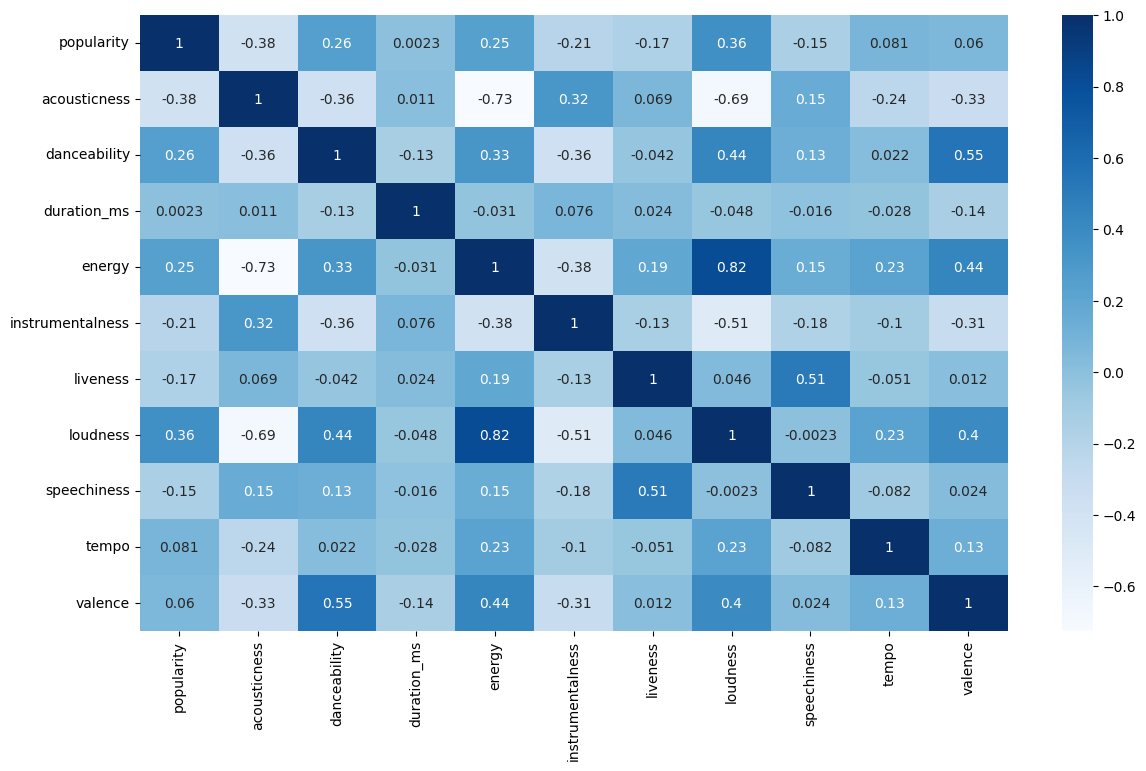

In [47]:
#pearson correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
cor = dftemp.corr(numeric_only=True)
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

In [48]:
# Correlation Matrix
cor

,genre,artist_name,popularity,danceability,duration_ms,energy,key,loudness,mode,speechiness,tempo
genre,1.000000,-0.015852,0.103796,0.001408,-0.005496,-0.070825,-0.012724,-0.031509,0.042768,-0.135872,-0.017247
artist_name,-0.015852,1.000000,0.034586,0.033856,-0.018113,0.051135,-0.000826,0.062213,-0.009562,-0.045753,0.028945
popularity,0.103796,0.034586,1.000000,0.256540,0.002343,0.248900,-0.000941,0.362994,0.070562,-0.151116,0.081031
danceability,0.001408,0.033856,0.256540,1.000000,-0.125779,0.325774,-0.006988,0.438643,0.061888,0.134563,0.021936
duration_ms,-0.005496,-0.018113,0.002343,-0.125779,1.000000,-0.030554,-0.003509,-0.047631,0.011548,-0.016183,-0.028457
energy,-0.070825,0.051135,0.248900,0.325774,-0.030554,1.000000,-0.010399,0.816086,0.041292,0.145124,0.228782
key,-0.012724,-0.000826,-0.000941,-0.006988,-0.003509,-0.010399,1.000000,-0.009408,-0.051274,0.000025,-0.007293
loudness,-0.031509,0.062213,0.362994,0.438643,-0.047631,0.816086,-0.009408,1.000000,0.027099,-0.002261,0.228363
mode,0.042768,-0.009562,0.070562,0.061888,0.011548,0.041292,-0.051274,0.027099,1.000000,0.026065,-0.011736
speechiness,-0.135872,-0.045753,-0.151116,0.134563,-0.016183,0.145124,0.000025,-0.002261,0.026065,1.000000,-0.081541


In [49]:
cor.columns

Index(['genre', 'artist_name', 'popularity', 'danceability', 'duration_ms',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'tempo'],
      dtype='object')

In [50]:
def correlation(dataset, threshold):
    corr_matrix=cor
    # A Set in Python programming is an unordered collection data type that is 
    # iterable, mutable and has no duplicate elements.
    column_corr=set() # creates empty set
    len_columns=len(corr_matrix.columns)
    for i in range(len_columns):
        for j in range(i) : # not takes if i == j
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                column_corr.add(colname)
    return column_corr           

In [51]:
# finding features for removal
corr_features=correlation(X_train, 0.8)
print(len(corr_features))
print(corr_features)

1
{'loudness'}


In [52]:
dftemp.dtypes

genre                 int32
artist_name           int32
popularity            int64
danceability        float64
duration_ms           int64
energy              float64
key                   int32
loudness            float64
mode                float64
speechiness         float64
tempo               float64
instrumentalness     object
liveness             object
dtype: object

In [53]:
dftemp

,genre,artist_name,popularity,danceability,duration_ms,energy,key,loudness,mode,speechiness,tempo,instrumentalness,liveness
0,15,5181,0,0.389,99373,0.910,4,-1.828,0.0,0.0525,166.969,0.000,0.346
1,15,8254,1,0.590,137373,0.737,9,-5.559,1.0,0.0868,174.003,0.000,0.151
2,15,6451,3,0.663,170267,0.131,3,-13.879,1.0,0.0362,99.488,0.000,0.103
3,15,5181,0,0.240,152427,0.326,4,-12.178,0.0,0.0395,171.758,0.000,0.099
4,15,4074,4,0.331,82625,0.225,8,-21.150,0.0,0.0456,140.576,0.123,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,24,11433,39,0.687,326240,0.714,5,-10.626,0.0,0.0316,115.542,0.544,0.085
232721,24,6508,38,0.785,282447,0.683,7,-6.944,1.0,0.0337,113.830,0.001,0.237
232722,24,8914,47,0.517,166960,0.419,5,-8.282,0.0,0.1480,84.135,0.000,0.095
232723,24,10196,44,0.745,222442,0.704,0,-7.137,0.0,0.1460,100.031,0.000,0.333


In [54]:
X=dftemp.drop('genre', axis=1)
y=dftemp['genre']
X,y

(        artist_name  popularity  danceability  duration_ms  energy  key  \
 0              5181           0         0.389        99373   0.910    4   
 1              8254           1         0.590       137373   0.737    9   
 2              6451           3         0.663       170267   0.131    3   
 3              5181           0         0.240       152427   0.326    4   
 4              4074           4         0.331        82625   0.225    8   
 ...             ...         ...           ...          ...     ...  ...   
 232720        11433          39         0.687       326240   0.714    5   
 232721         6508          38         0.785       282447   0.683    7   
 232722         8914          47         0.517       166960   0.419    5   
 232723        10196          44         0.745       222442   0.704    0   
 232724         8701          35         0.758       323027   0.470   11   
 
         loudness  mode  speechiness    tempo instrumentalness liveness  
 0         -

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

<Axes: >

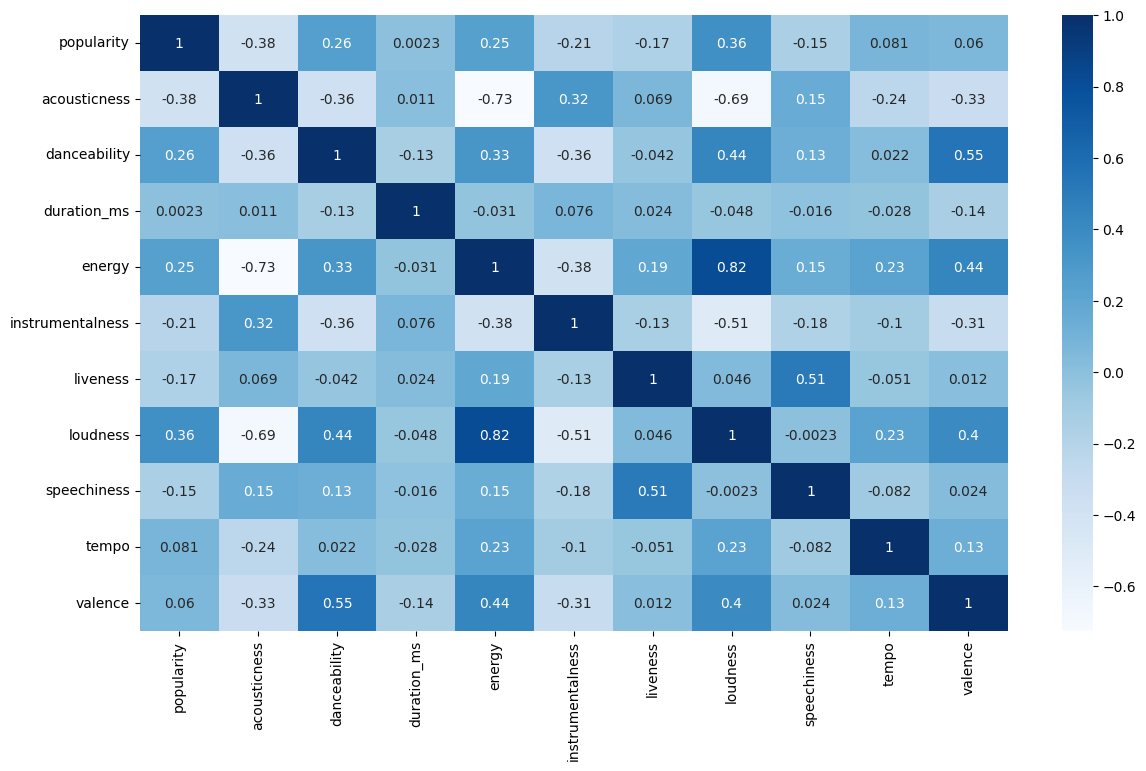

In [56]:
#pearson correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
cor = dftemp.corr(numeric_only=True)
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

In [57]:
# Correlation Matrix
cor

,genre,artist_name,popularity,danceability,duration_ms,energy,key,loudness,mode,speechiness,tempo
genre,1.000000,-0.015852,0.103796,0.001408,-0.005496,-0.070825,-0.012724,-0.031509,0.042768,-0.135872,-0.017247
artist_name,-0.015852,1.000000,0.034586,0.033856,-0.018113,0.051135,-0.000826,0.062213,-0.009562,-0.045753,0.028945
popularity,0.103796,0.034586,1.000000,0.256540,0.002343,0.248900,-0.000941,0.362994,0.070562,-0.151116,0.081031
danceability,0.001408,0.033856,0.256540,1.000000,-0.125779,0.325774,-0.006988,0.438643,0.061888,0.134563,0.021936
duration_ms,-0.005496,-0.018113,0.002343,-0.125779,1.000000,-0.030554,-0.003509,-0.047631,0.011548,-0.016183,-0.028457
energy,-0.070825,0.051135,0.248900,0.325774,-0.030554,1.000000,-0.010399,0.816086,0.041292,0.145124,0.228782
key,-0.012724,-0.000826,-0.000941,-0.006988,-0.003509,-0.010399,1.000000,-0.009408,-0.051274,0.000025,-0.007293
loudness,-0.031509,0.062213,0.362994,0.438643,-0.047631,0.816086,-0.009408,1.000000,0.027099,-0.002261,0.228363
mode,0.042768,-0.009562,0.070562,0.061888,0.011548,0.041292,-0.051274,0.027099,1.000000,0.026065,-0.011736
speechiness,-0.135872,-0.045753,-0.151116,0.134563,-0.016183,0.145124,0.000025,-0.002261,0.026065,1.000000,-0.081541


In [58]:
cor.columns

Index(['genre', 'artist_name', 'popularity', 'danceability', 'duration_ms',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'tempo'],
      dtype='object')

In [59]:
def correlation(dataset, threshold):
    corr_matrix=cor
    # A Set in Python programming is an unordered collection data type that is 
    # iterable, mutable and has no duplicate elements.
    column_corr=set() # creates empty set
    len_columns=len(corr_matrix.columns)
    for i in range(len_columns):
        for j in range(i) : # not takes if i == j
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                column_corr.add(colname)
    return column_corr           

In [60]:
# finding features for removal
corr_features=correlation(X_train, 0.8)
print(len(corr_features))
print(corr_features)

1
{'loudness'}


In [61]:
X_train.drop(corr_features, axis=1)

,artist_name,popularity,danceability,duration_ms,energy,key,mode,speechiness,tempo,instrumentalness,liveness
103809,940,44,0.800,261253,0.4960,2,0.0,0.3340,90.916,0.000,0.178
180923,3071,32,0.601,146707,0.4700,8,1.0,0.0291,110.735,0.000,0.281
46656,2026,47,0.518,232947,0.8790,9,1.0,0.0374,95.403,0.429,0.151
54560,5471,2,0.655,312684,0.6410,8,1.0,0.0274,126.969,0.000,0.090
50489,1558,31,0.614,137693,0.1360,1,0.0,0.0380,113.967,0.000,0.089
...,...,...,...,...,...,...,...,...,...,...,...
176970,6671,9,0.308,203375,0.4420,0,1.0,0.0577,158.921,0.834,0.140
117958,4225,57,0.659,172545,0.7340,11,0.0,0.2060,110.916,0.000,0.106
173692,11354,15,0.503,110933,0.8900,9,0.0,0.9470,93.013,0.000,0.701
43568,9448,51,0.533,331800,0.7830,0,0.0,0.0314,109.899,0.000,0.109


In [62]:
X_test.drop(corr_features, axis=1)

,artist_name,popularity,danceability,duration_ms,energy,key,mode,speechiness,tempo,instrumentalness,liveness
227324,13923,51,0.701,215240,0.580,11,0.0,0.0448,112.052,0.017,0.087
37949,14041,35,0.717,271885,0.983,6,1.0,0.0942,128.004,0.491,0.108
14900,828,64,0.622,217053,0.586,6,1.0,0.0356,145.080,0.000,0.080
220076,5252,24,0.294,92480,0.863,0,0.0,0.0392,147.038,0.817,0.623
34568,10887,28,0.519,310707,0.707,7,0.0,0.0261,180.030,0.001,0.212
...,...,...,...,...,...,...,...,...,...,...,...
5999,2694,48,0.783,194491,0.459,11,1.0,0.0836,131.087,0.021,0.187
45605,14244,16,0.140,196200,0.166,3,1.0,0.0423,82.654,0.348,0.165
198193,5062,47,0.474,107854,0.403,4,0.0,0.0421,179.965,0.903,0.106
10902,11143,46,0.560,272907,0.855,0,1.0,0.0305,130.702,0.001,0.124


In [63]:
dftemp['genre'].unique()

array([15, 18,  0,  1,  8,  9, 10,  2, 11,  3, 16, 12,  4,  5, 19, 13,  6,
       17, 20, 21, 14, 22, 23,  7, 24, 25, 26])

In [64]:
X=dftemp.drop('genre', axis=1)
y=dftemp['genre']
X,y

(        artist_name  popularity  danceability  duration_ms  energy  key  \
 0              5181           0         0.389        99373   0.910    4   
 1              8254           1         0.590       137373   0.737    9   
 2              6451           3         0.663       170267   0.131    3   
 3              5181           0         0.240       152427   0.326    4   
 4              4074           4         0.331        82625   0.225    8   
 ...             ...         ...           ...          ...     ...  ...   
 232720        11433          39         0.687       326240   0.714    5   
 232721         6508          38         0.785       282447   0.683    7   
 232722         8914          47         0.517       166960   0.419    5   
 232723        10196          44         0.745       222442   0.704    0   
 232724         8701          35         0.758       323027   0.470   11   
 
         loudness  mode  speechiness    tempo instrumentalness liveness  
 0         -

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [66]:
#No negative value. Highest value is more important feature.
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([2.412, 0.748, 0.298, 0.157, 0.314, 0.025, 0.312, 0.024, 0.316,
       0.161, 0.237, 0.114])

In [67]:
# Converting into Series and sorting
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info

artist_name         2.411995
popularity          0.747734
speechiness         0.315656
energy              0.314207
loudness            0.312491
danceability        0.297842
instrumentalness    0.237103
tempo               0.160584
duration_ms         0.157463
liveness            0.114424
key                 0.025166
mode                0.024162
dtype: float64

<Axes: >

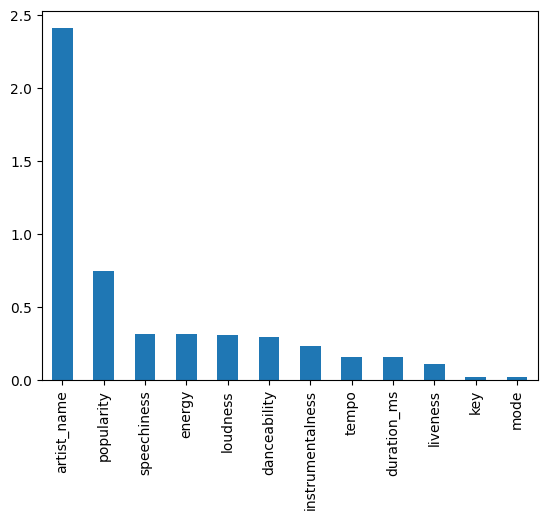

In [68]:
mutual_info.plot(kind='bar')

In [69]:
from sklearn.feature_selection import SelectKBest
sel_top_8_features=SelectKBest(mutual_info_classif, k=8)
sel_top_8_features.fit(X_train, y_train)
sel_top_8_features.get_support()

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False])

In [70]:
X_train.columns[sel_top_8_features.get_support()]

Index(['artist_name', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'tempo', 'instrumentalness'],
      dtype='object')

In [71]:
df5 = dftemp.copy()

NameError: name 'df_temp' is not defined